# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
from ipywidgets import FloatProgress
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
##Define the transformation: Convert to tensor & normalize 
transform_act = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Create training set and define training dataloader
## YOUR CODE HERE ##
#Load the training dataset
train_data = torchvision.datasets.MNIST(root='./data',
                                        transform =transform_act,
                                        train = True, 
                                        download = True)

#train_data.data = train_data.data.view(train_data.data.size(0), -1)

train_data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=8,
                                          shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
#Load the testing dataset
test_data = torchvision.datasets.MNIST(root="./data/",
                                       transform = transform_act,
                                       train = False,
                                       download = True)
#test_data.data = test_data.data.view(test_data.data.size(0), -1)

test_data_loader = torch.utils.data.DataLoader(dataset=test_data,
                                               batch_size = 8,
                                               shuffle = True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
train_data_size = len(train_data_loader.dataset)
print("Train DataLoader size:", train_data_size)
test_data_size = len(test_data_loader.dataset)
print("Train DataLoader size:", test_data_size)

Train DataLoader size: 60000
Train DataLoader size: 10000


In [4]:
#Check the size and the shape of the training dataset 
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

#Check the size and the shape of the testing dataset 
dataiter = iter(test_data_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])
torch.Size([8, 1, 28, 28])
torch.Size([8])


We have 60,000 training data and 10,000 testing data. Each batch consists of 8 images, each image's size is 28X28 

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I choose the totensor and normalization, since  we need to convert the image into number, so we use the totensor to indicate a single grayscale channel. For the normalization, we normalize the data to help improve model convergence and performance. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


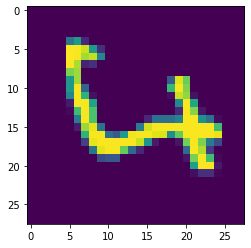

4


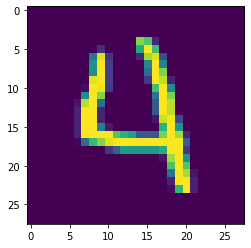

0


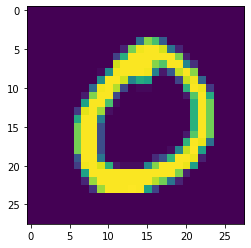

5


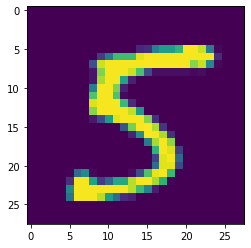

0


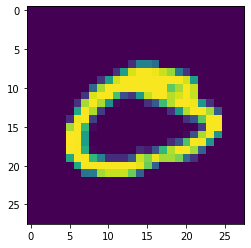

In [6]:
# Explore data
## YOUR CODE HERE ##
show5(train_data_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
##Create the NN, the NN consists of 2 CNN layer n
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Flatten Layer
        self.flatten = nn.Flatten()

        # Fully Connected Layers
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Apply convolutions and pooling
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # Flatten the tensor
        x = self.flatten(x)

        # Apply fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [13]:
## YOUR CODE HERE ##
#Instantiate the model 
model = Model()

#Specify the loss function 
criterion = torch.nn.CrossEntropyLoss()

#Specify the optimizer 
optimizer = torch.optim.Adam(model.parameters())

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
## YOUR CODE HERE ##
#Set up the GPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#Specify the training hyperparameter 
num_epochs = 5 

# Training loop
total_steps = len(train_data_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_data_loader):
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print training progress
        if (i + 1) % 250 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_steps}], Loss: {loss.item()}")

# Training complete
print("Training finished.")

Epoch [1/5], Step [250/7500], Loss: 0.03012233041226864
Epoch [1/5], Step [500/7500], Loss: 0.17369571328163147
Epoch [1/5], Step [750/7500], Loss: 0.005512060597538948
Epoch [1/5], Step [1000/7500], Loss: 0.08840153366327286
Epoch [1/5], Step [1250/7500], Loss: 0.004487529397010803
Epoch [1/5], Step [1500/7500], Loss: 5.7924833527067676e-05
Epoch [1/5], Step [1750/7500], Loss: 0.1803838163614273
Epoch [1/5], Step [2000/7500], Loss: 0.10205134749412537
Epoch [1/5], Step [2250/7500], Loss: 0.0828281044960022
Epoch [1/5], Step [2500/7500], Loss: 0.056466277688741684
Epoch [1/5], Step [2750/7500], Loss: 0.0005747312679886818
Epoch [1/5], Step [3000/7500], Loss: 0.0024706916883587837
Epoch [1/5], Step [3250/7500], Loss: 0.007965926080942154
Epoch [1/5], Step [3500/7500], Loss: 0.002857196144759655
Epoch [1/5], Step [3750/7500], Loss: 0.005220021586865187
Epoch [1/5], Step [4000/7500], Loss: 0.03648676723241806
Epoch [1/5], Step [4250/7500], Loss: 0.0005083727301098406
Epoch [1/5], Step [45

Epoch [5/5], Step [5500/7500], Loss: 2.279867658216972e-06
Epoch [5/5], Step [5750/7500], Loss: 0.0008191931410692632
Epoch [5/5], Step [6000/7500], Loss: 1.3560008937929524e-06
Epoch [5/5], Step [6250/7500], Loss: 2.3601334760314785e-05
Epoch [5/5], Step [6500/7500], Loss: 2.2202630134415813e-06
Epoch [5/5], Step [6750/7500], Loss: 0.0002479195536579937
Epoch [5/5], Step [7000/7500], Loss: 0.0003261216334067285
Epoch [5/5], Step [7250/7500], Loss: 1.5452244042535312e-05
Epoch [5/5], Step [7500/7500], Loss: 0.011842424049973488
Training finished.


Plot the training loss (and validation loss/accuracy, if recorded).

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

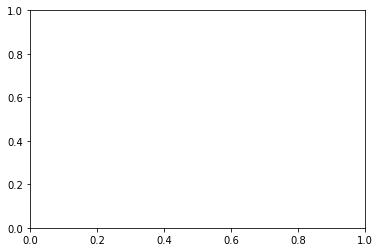

In [27]:
## YOUR CODE HERE ##
#Plotting the training and validation loss if recorded
train_values = loss
#val_values = val_loss

# Generate a sequence of integers to represent the epoch numbers
num_epoch = range(1, num_epochs+1)
 
# Plot and label the training and validation loss values
plt.plot(num_epoch, train_values, label='Training Loss')
#plt.plot(num_epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, epochs+1, 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
## YOUR CODE HERE ##
# Evaluate the model
model.eval()

# Tracking variables for accuracy calculation
correct = 0
total = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, labels in test_data_loader:
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 98.90%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [22]:
## YOUR CODE HERE ##
model_path = './trained_model/'

# Save the model
torch.save(model.state_dict(), model_path)

IsADirectoryError: [Errno 21] Is a directory: './trained_model/'